# Project Terms
Hoang Luong<br>
Khalid<br>
Milan

In [306]:
#1
!pip install -U -q PyDrive
import pandas as pd
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id': "1jnd9kqvJaIuAIP0S1biVHrGMq_mK3GzO"}) 
downloaded.GetContentFile('apartments_for_rent_classified_10K.xlsx')  
#df = pd.read_csv('apartments_for_rent_classified_10K.xlsx')

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 44, in autodetect
    from . import file_cache
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    "file_cach

# **Data collection and cleaning**

In [307]:
#2
from pandas import read_excel
my_sheet = 'apartments_for_rent_classif (2)' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = 'apartments_for_rent_classified_10K.xlsx' # change it to the name of your excel file
df = read_excel(file_name, sheet_name = my_sheet)
df.head() # shows headers with top 5 rows

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,nan,0,USD,No,Thumbnail,None,790,$790,Monthly,101,NaN,Washington,DC,39,-77,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,nan,1,USD,No,Thumbnail,None,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,38,-88,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1,0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,NaN,Arlington,VA,39,-77,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1,0,USD,No,Thumbnail,None,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,48,-122,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,nan,0,USD,No,Thumbnail,None,880,$880,Monthly,125,NaN,Arlington,VA,39,-77,RentLingo,1577359401


In [308]:
#3
df.shape

(10000, 22)

In [309]:
#4
print(df.columns.values)

['id' 'category' 'title' 'body' 'amenities' 'bathrooms' 'bedrooms'
 'currency' 'fee' 'has_photo' 'pets_allowed' 'price' 'price_display'
 'price_type' 'square_feet' 'address' 'cityname' 'state' 'latitude'
 'longitude' 'source' 'time']


# **STEP 2: Finding missing data**


In [310]:
#5
df.isnull().sum()

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     1748
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

Using isnull().sum on dataframe object df we find all missing values. We have Amenities=3549,Bathrooms=33,Bedrooms, Pet_allowed=1745, address=3325, cityname=77, state=77, latitute=10,longitude=10.


In [311]:
#6
#Total no of rows missing
sum(df.isnull().any(axis=1))

6457

In [312]:
#6
#checking missing values in column amenities
# creating bool series True for NaN values 
bool_series = pd.isnull(df["amenities"]) 
	
# filtering data 
# displaying data only with amenities = NaN 
df[bool_series] 


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,nan,0,USD,No,Thumbnail,None,790,$790,Monthly,101,NaN,Washington,DC,39,-77,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,nan,1,USD,No,Thumbnail,None,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,38,-88,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1,0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,NaN,Arlington,VA,39,-77,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1,0,USD,No,Thumbnail,None,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,48,-122,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,nan,0,USD,No,Thumbnail,None,880,$880,Monthly,125,NaN,Arlington,VA,39,-77,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,5659917503,housing/rent/apartment,Four BR 17595 Burl Oak Court,"This unit is located at 17595 Burl Oak Court, ...",NaN,5,4,USD,No,Thumbnail,None,4500,"$4,500",Monthly,5407,17595 Burl Oak CT,Eden Prairie,MN,45,-93,RentLingo,1576667692
9994,5664597657,housing/rent/apartment,Six BR 2536 W Canyon Ridge Rd.,This unit is located at 2536 W Canyon Ridge Rd...,NaN,4,6,USD,No,Thumbnail,None,3000,"$3,000",Monthly,5921,2536 W Canyon Ridge Road,Saint George,UT,37,-114,RentLingo,1577017103
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4,5,USD,No,Thumbnail,None,6000,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,45,-93,RentLingo,1575112975
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8,6,USD,No,Thumbnail,None,25000,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34,-120,RentLingo,1577360419


In [313]:
#7
#checking missing values in column cityname           
# creating bool series True for NaN values 
nan_city_name = pd.isnull(df["cityname"]) 
	
# filtering data 
# displaying data only with Gender = NaN 
df[nan_city_name] 


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
22,5664567303,housing/rent/apartment,One BR Leeward Ct,"This unit is located at Leeward Ct, Fleming Is...",NaN,1,1,USD,No,Thumbnail,None,525,$525,Monthly,200,NaN,NaN,NaN,nan,nan,RentLingo,1577014825
31,5668619369,housing/rent/apartment,One BR Mullica Way,"This unit is located at Mullica Way, Devonshir...",Pool,1,1,USD,No,Thumbnail,None,750,$750,Monthly,219,NaN,NaN,NaN,nan,nan,RentLingo,1577358921
37,5664573404,housing/rent/apartment,One BR New Providence Dr Apartment 90,This unit is located at New Providence Dr Apar...,NaN,1,1,USD,No,Thumbnail,None,750,$750,Monthly,220,NaN,NaN,NaN,nan,nan,RentLingo,1577015212
76,5664574093,housing/rent/apartment,One BR 8th Avenue North,"This unit is located at eighth Avenue North, O...",NaN,1,1,USD,No,Thumbnail,None,1025,"$1,025",Monthly,250,8th Ave North,NaN,NaN,40,-99,RentLingo,1577015259
161,5668622658,housing/rent/apartment,One BR Hinson Ave,"This unit is located at Hinson Ave, Haines, 33...",Pool,1,1,USD,No,Thumbnail,None,625,$625,Monthly,250,NaN,NaN,NaN,nan,nan,RentLingo,1577359130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,5664596769,housing/rent/apartment,"Two BR 1833 Lombard St, Unit B","This unit is located at 1833 Lombard St, Unit ...",NaN,1,2,USD,No,Thumbnail,None,2095,"$2,095",Monthly,1650,1833 Lombard St Unit B,NaN,NaN,40,-99,RentLingo,1577017017
9259,5664597711,housing/rent/apartment,Two BR Lakeside Blvd,"This unit is located at Lakeside Blvd, Shelby ...",NaN,2,2,USD,No,Thumbnail,"Cats,Dogs",1650,"$1,650",Monthly,1665,NaN,NaN,NaN,nan,nan,RentLingo,1577017108
9542,5668624794,housing/rent/apartment,Five BR 22 Austin Street,"This unit is located at 22 Austin Street, Char...","Dishwasher,Parking,Patio/Deck,Refrigerator",2,5,USD,No,Thumbnail,None,4500,"$4,500",Monthly,1950,22 Austin St,NaN,NaN,40,-99,RentLingo,1577359268
9561,5668633890,housing/rent/apartment,Three BR 229 Delmont St #259,"This unit is located at 229 Delmont St #259, C...",NaN,2,3,USD,No,Thumbnail,"Cats,Dogs",1985,"$1,985",Monthly,1975,229 Delmont St #259,NaN,NaN,40,-99,RentLingo,1577359942


In [314]:
#(8)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,nan,0,USD,No,Thumbnail,None,790,$790,Monthly,101,NaN,Washington,DC,39,-77,RentLingo,2019-12-26 11:23:35
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,nan,1,USD,No,Thumbnail,None,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,38,-88,RentLingo,2019-12-22 12:17:43
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1,0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,NaN,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:30
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1,0,USD,No,Thumbnail,None,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,48,-122,RentLingo,2019-12-18 11:15:43
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,nan,0,USD,No,Thumbnail,None,880,$880,Monthly,125,NaN,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:21


In [315]:
#9
import numpy as np
# Checking out the total unique categories in the dataset
np.unique(df['category'])

# Found that there are 3 unique categories ['housing/rent/apartment', 'housing/rent/home', 'housing/rent/short_term']

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term'], dtype=object)

In [316]:
# checking that what are the occurences of each unique categories in the dataset
df['category'].value_counts()

housing/rent/apartment     9996
housing/rent/home             2
housing/rent/short_term       2
Name: category, dtype: int64

In [317]:
#10

df.drop(index=df[df['category'] == 'housing/rent/short_term'].index, inplace=True)
df.drop(index=df[df['category'] == 'housing/rent/home'].index, inplace=True)
df['category'].value_counts()
del df['category']
print(df.head())

           id  ...                time
0  5668626895  ... 2019-12-26 11:23:35
1  5664597177  ... 2019-12-22 12:17:43
2  5668626833  ... 2019-12-26 11:23:30
3  5659918074  ... 2019-12-18 11:15:43
4  5668626759  ... 2019-12-26 11:23:21

[5 rows x 21 columns]


In [318]:
#11
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude
count,"9,996","9,963","9,989","9,996","9,996","9,986","9,986"
mean,"5,623,385,271",1,2,"1,487",946,38,-95
std,"70,221,786",1,1,"1,077",656,5,16
min,"5,508,654,087",1,0,200,101,21,-158
25%,"5,509,248,188",1,1,949,649,34,-101
50%,"5,668,609,611",1,2,"1,270",802,39,-94
75%,"5,668,626,453",2,2,"1,695","1,100",41,-82
max,"5,668,662,559",8,9,"52,500","40,000",62,-70


In [319]:
#12
df.shape

(9996, 21)

In [320]:
#13
df.tail(5)

,id,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
9995,5630240092,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4,5,USD,No,Thumbnail,None,6000,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,45,-93,RentLingo,2019-11-30 11:22:55
9996,5668640983,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8,6,USD,No,Thumbnail,None,25000,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34,-120,RentLingo,2019-12-26 11:40:19
9997,5668643292,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",NaN,8,6,USD,No,Thumbnail,None,11000,"$11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39,-77,RentLingo,2019-12-26 11:42:40
9998,5668662559,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",nan,1,USD,No,Thumbnail,NaN,4790,"$4,790",Monthly,40000,NaN,New York,NY,41,-74,Listanza,2019-12-26 12:09:46
9999,5509132540,Beautiful Lawrenceville Apartment for rent,"Square footage: 880 sq. feet, unit number: 150...","Gym,Patio/Deck",1,1,USD,No,No,NaN,1009,"$1,009",Monthly,880,NaN,Lawrenceville,GA,34,-84,RentDigs.com,2019-12-26 12:09:01


In [321]:
#14
import numpy as np
np.unique(df['currency'])


array(['USD'], dtype=object)

In [322]:
del df['currency']
df.head()

,id,title,body,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,nan,0,No,Thumbnail,None,790,$790,Monthly,101,NaN,Washington,DC,39,-77,RentLingo,2019-12-26 11:23:35
1,5664597177,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,nan,1,No,Thumbnail,None,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,38,-88,RentLingo,2019-12-22 12:17:43
2,5668626833,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1,0,No,Thumbnail,None,1390,"$1,390",Monthly,107,NaN,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:30
3,5659918074,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1,0,No,Thumbnail,None,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,48,-122,RentLingo,2019-12-18 11:15:43
4,5668626759,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,nan,0,No,Thumbnail,None,880,$880,Monthly,125,NaN,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:21


In [323]:
del df['title']
del df['body']
del df['price_display']
del df['id']
del df['fee']
df.head()

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,NaN,nan,0,Thumbnail,None,790,Monthly,101,NaN,Washington,DC,39,-77,RentLingo,2019-12-26 11:23:35
1,NaN,nan,1,Thumbnail,None,425,Monthly,106,814 Schutte Rd,Evansville,IN,38,-88,RentLingo,2019-12-22 12:17:43
2,NaN,1,0,Thumbnail,None,1390,Monthly,107,NaN,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:30
3,NaN,1,0,Thumbnail,None,925,Monthly,116,1717 12th Avenue,Seattle,WA,48,-122,RentLingo,2019-12-18 11:15:43
4,NaN,nan,0,Thumbnail,None,880,Monthly,125,NaN,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:21


**#Step3 : Visualize dataset for distribution by Constructing histograms, box plots, and scatter plots**


In [324]:
#15
import numpy as np
import pandas as pd
from pandas import Series, DataFrame


from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [325]:
#16
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [326]:
#26
!pip install geopandas

In [327]:
#32
print(df[df['state'].isnull()])

                                       amenities  ...                time
22                                           NaN  ... 2019-12-22 11:40:25
31                                          Pool  ... 2019-12-26 11:15:21
37                                           NaN  ... 2019-12-22 11:46:52
76                                           NaN  ... 2019-12-22 11:47:39
161                                         Pool  ... 2019-12-26 11:18:50
...                                          ...  ...                 ...
9238                                         NaN  ... 2019-12-22 12:16:57
9259                                         NaN  ... 2019-12-22 12:18:28
9542  Dishwasher,Parking,Patio/Deck,Refrigerator  ... 2019-12-26 11:21:08
9561                                         NaN  ... 2019-12-26 11:32:22
9778                                         NaN  ... 2019-12-26 11:23:37

[77 rows x 15 columns]


Converting pets to zero if no pets are allowed and 1 if pets are allowed

In [328]:
#33
df.pets_allowed.unique()

array(['None', nan, 'Cats,Dogs', 'Cats', 'Dogs'], dtype=object)

Pets_allowed contains 4 categories
1.none
2.nan
3.cats
4.dogs

lets first delete nan

In [329]:
#34 deleting rows containing nan as we have large dataset.
df=df.dropna(subset=['pets_allowed'])

In [330]:
df.pets_allowed.unique()

array(['None', 'Cats,Dogs', 'Cats', 'Dogs'], dtype=object)

dropping nan values of bathroom as it has only 33 rows

In [331]:
#36
df=df.dropna(subset=['bathrooms'])
df.head()


,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
2,NaN,1,0,Thumbnail,None,1390,Monthly,107,NaN,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:30
3,NaN,1,0,Thumbnail,None,925,Monthly,116,1717 12th Avenue,Seattle,WA,48,-122,RentLingo,2019-12-18 11:15:43
8,Refrigerator,1,0,Thumbnail,None,1495,Monthly,138,333 Hyde St,San Francisco,CA,38,-122,RentLingo,2019-12-26 11:05:13
14,Refrigerator,1,0,Thumbnail,None,1695,Monthly,190,57 Taylor St,San Francisco,CA,38,-122,RentLingo,2019-12-22 11:45:21
15,"AC,Basketball,Cable or Satellite,Gym,Internet ...",1,1,Thumbnail,"Cats,Dogs",1560,Weekly,200,NaN,New Bern,NC,35,-77,ListedBuy,2019-12-17 21:27:56


dropping nan values of bedrooms as it has only 4 rows

In [332]:
#38
df=df.dropna(subset=['bedrooms'])
df=df.dropna(subset=['latitude'])
df=df.dropna(subset=['longitude'])
df=df.dropna(subset=['state'])
df=df.dropna(subset=['cityname'])

In [333]:
#39
df.isnull().sum()

amenities       3289
bathrooms          0
bedrooms           0
has_photo          0
pets_allowed       0
price              0
price_type         0
square_feet        0
address         1674
cityname           0
state              0
latitude           0
longitude          0
source             0
time               0
dtype: int64

In [334]:
df.head()

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
2,NaN,1,0,Thumbnail,None,1390,Monthly,107,NaN,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:30
3,NaN,1,0,Thumbnail,None,925,Monthly,116,1717 12th Avenue,Seattle,WA,48,-122,RentLingo,2019-12-18 11:15:43
8,Refrigerator,1,0,Thumbnail,None,1495,Monthly,138,333 Hyde St,San Francisco,CA,38,-122,RentLingo,2019-12-26 11:05:13
14,Refrigerator,1,0,Thumbnail,None,1695,Monthly,190,57 Taylor St,San Francisco,CA,38,-122,RentLingo,2019-12-22 11:45:21
15,"AC,Basketball,Cable or Satellite,Gym,Internet ...",1,1,Thumbnail,"Cats,Dogs",1560,Weekly,200,NaN,New Bern,NC,35,-77,ListedBuy,2019-12-17 21:27:56


# Measure of central tendency for each feature

In [335]:
number_df = df[['bathrooms', 'bedrooms', 'price', 'square_feet']]
string_df = df[['pets_allowed', 'cityname', 'state', 'source']]
df.head()

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
2,NaN,1,0,Thumbnail,None,1390,Monthly,107,NaN,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:30
3,NaN,1,0,Thumbnail,None,925,Monthly,116,1717 12th Avenue,Seattle,WA,48,-122,RentLingo,2019-12-18 11:15:43
8,Refrigerator,1,0,Thumbnail,None,1495,Monthly,138,333 Hyde St,San Francisco,CA,38,-122,RentLingo,2019-12-26 11:05:13
14,Refrigerator,1,0,Thumbnail,None,1695,Monthly,190,57 Taylor St,San Francisco,CA,38,-122,RentLingo,2019-12-22 11:45:21
15,"AC,Basketball,Cable or Satellite,Gym,Internet ...",1,1,Thumbnail,"Cats,Dogs",1560,Weekly,200,NaN,New Bern,NC,35,-77,ListedBuy,2019-12-17 21:27:56


In [336]:
string_df.describe()

,pets_allowed,cityname,state,source
count,8139,8139,8139,8139
unique,4,1436,51,10
top,"Cats,Dogs",Austin,TX,RentLingo
freq,5171,522,1555,6803


In [337]:
string_df.mode()

,pets_allowed,cityname,state,source
0,"Cats,Dogs",Austin,TX,RentLingo


In [338]:
number_df.describe()

,bathrooms,bedrooms,price,square_feet
count,"8,139","8,139","8,139","8,139"
mean,1,2,"1,470",943
std,1,1,968,563
min,1,0,200,107
25%,1,1,925,625
50%,1,2,"1,250",789
75%,2,2,"1,675","1,100"
max,8,9,"25,000","11,318"


In [339]:
# Mean: average value
print("\033[1mMean:\033[0m \n", number_df.mean())
# Median: value in the middle of a sorted array
print("\033[1mMedian:\033[0m \n", number_df.median())
# Mode: most frequent value in column
print("\033[1mMode:\033[0m \n", number_df.mode())
# Standard deviation (SD) = variance^0.5
print("\033[1mStandard deviation:\033[0m \n", number_df.std())
# IQR he interquartile range (IQR), also called the midspread, 
# middle 50%, or H‑spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles
Q1 = number_df.quantile(0.25)
Q3 = number_df.quantile(0.75)
IQR = Q3 - Q1
print("\033[1mIQR:\033[0m \n", IQR)

Mean: 
 bathrooms         1
bedrooms          2
price         1,470
square_feet     943
dtype: float64
Median: 
 bathrooms         1
bedrooms          2
price         1,250
square_feet     789
dtype: float64
Mode: 
    bathrooms  bedrooms  price  square_feet
0          1         1   1350          700
Standard deviation: 
 bathrooms       1
bedrooms        1
price         968
square_feet   563
dtype: float64
IQR: 
 bathrooms       1
bedrooms        1
price         750
square_feet   475
dtype: float64


# feature extraction:

checking unique values for column source

In [340]:
#44
np.unique(df['source'])

array(['GoSection8', 'Listanza', 'ListedBuy', 'RENTCafé', 'RENTOCULAR',
       'RealRentals', 'RentDigs.com', 'RentLingo', 'rentbits',
       'tenantcloud'], dtype=object)

In [341]:
#45
np.unique(df['cityname'])

array(['Aberdeen', 'Abilene', 'Abington', ..., 'Ypsilanti', 'Yuba City',
       'Yukon'], dtype=object)

In [342]:

#46
np.unique(df['state'])

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [343]:
#49
np.unique(df['has_photo'])


array(['No', 'Thumbnail', 'Yes'], dtype=object)

In [344]:
#52
df1=df[['bathrooms','bedrooms','price','square_feet']]
df1

,bathrooms,bedrooms,price,square_feet
2,1,0,1390,107
3,1,0,925,116
8,1,0,1495,138
14,1,0,1695,190
15,1,1,1560,200
...,...,...,...,...
9993,5,5,6900,5700
9994,4,6,3000,5921
9995,4,5,6000,6300
9996,8,6,25000,8716


outlier detection 

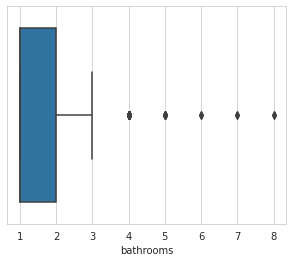

In [345]:
#53
import seaborn as sns
sns.boxplot(x=df['bathrooms'])



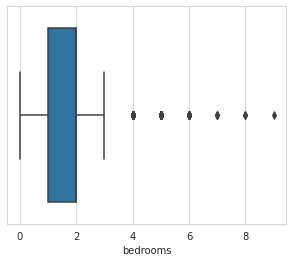

In [346]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      #54
sns.boxplot(x=df['bedrooms'])


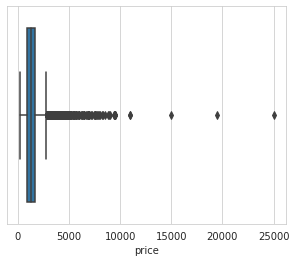

In [347]:
#55
sns.boxplot(x=df['price'])

In [348]:
#60

df['bedrooms'].value_counts()

1    3858
2    2509
3    1107
4     385
0     175
5      84
6      15
7       3
8       2
9       1
Name: bedrooms, dtype: int64

From the above results it can be observed that bedrooms=6,7,8 has only two rows and its an outlier so we will delete these rows

In [349]:
df_bed = df[ df['bedrooms'] > 6 ] # Step 1
df = df.drop(df_bed.index, axis=0) # Step 2

In [350]:
df['bathrooms'].value_counts()

1    5586
2    2249
3     170
4     117
5       7
8       2
6       2
Name: bathrooms, dtype: int64

It can be seen from the above results that theres only 2 rows for 6 and 8 bathrooms each. So we can delete them to avoid outliers.

In [351]:
df_bed = df[ df['bathrooms'] > 5 ] # Step 1
df = df.drop(df_bed.index, axis=0) # Step 2
df['bathrooms'].value_counts()

1    5586
2    2249
3     170
4     117
5       7
Name: bathrooms, dtype: int64

In [352]:
df['square_feet'].value_counts()

700     151
600     135
250     129
800     128
900     122
       ... 
190       1
2215      1
2207      1
2187      1
2065      1
Name: square_feet, Length: 1662, dtype: int64

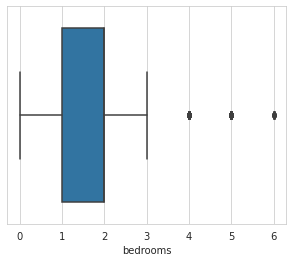

In [353]:
#61
sns.boxplot(x=df['bedrooms'])

using visualization to see the relation between the variables

[]

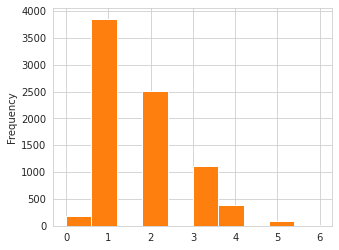

In [354]:
#63
bedrooms = df['bedrooms']
bedrooms.plot(kind='hist')
plt.hist(bedrooms)
plt.plot()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



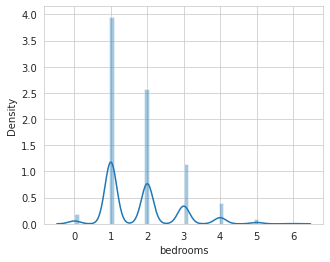

In [355]:
#63
sb.distplot(bedrooms)

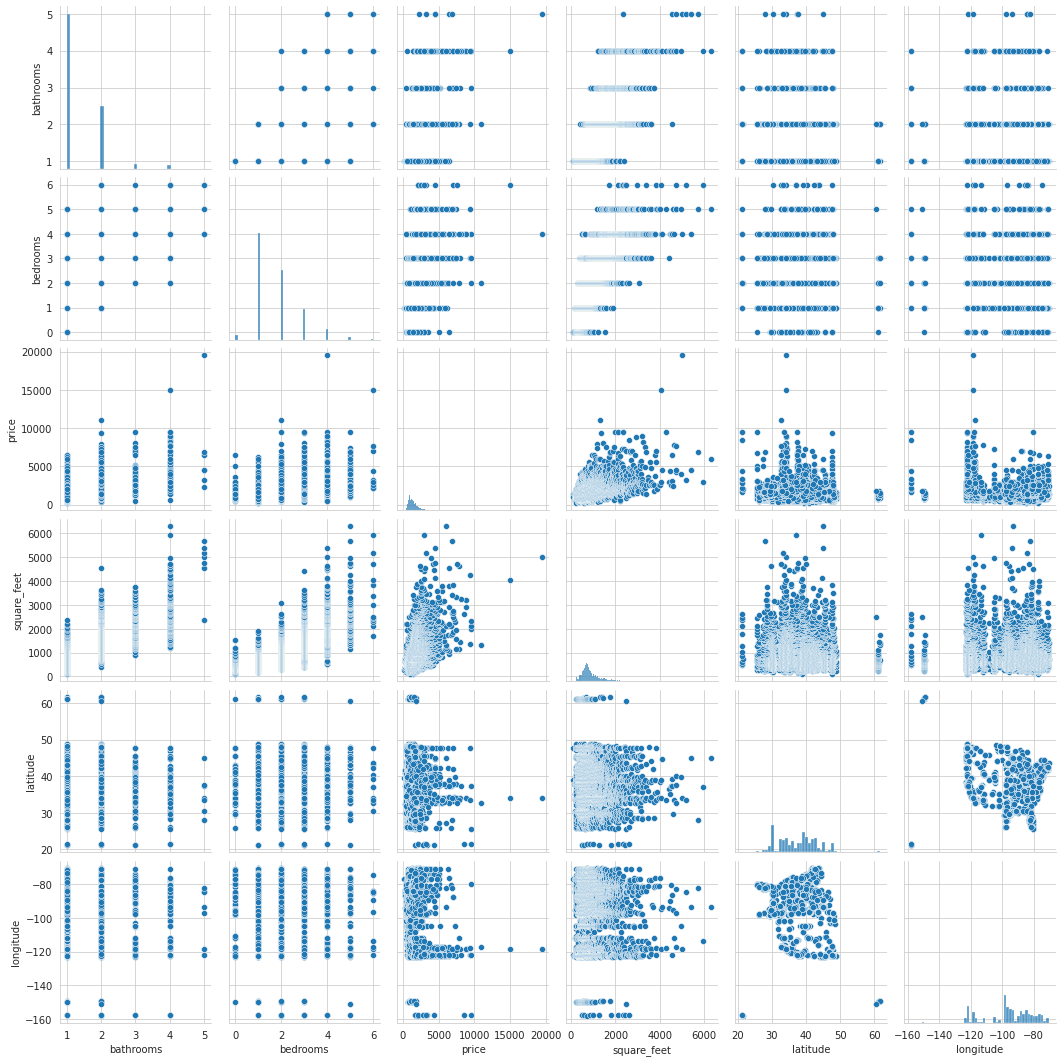

In [356]:
#64
sb.pairplot(df)

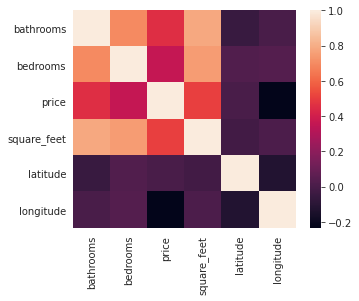

In [357]:
#65
df.corr()
sb.heatmap(df.corr())

In [358]:
#66
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8129 entries, 2 to 9995
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   amenities     4846 non-null   object        
 1   bathrooms     8129 non-null   float64       
 2   bedrooms      8129 non-null   float64       
 3   has_photo     8129 non-null   object        
 4   pets_allowed  8129 non-null   object        
 5   price         8129 non-null   int64         
 6   price_type    8129 non-null   object        
 7   square_feet   8129 non-null   int64         
 8   address       6455 non-null   object        
 9   cityname      8129 non-null   object        
 10  state         8129 non-null   object        
 11  latitude      8129 non-null   float64       
 12  longitude     8129 non-null   float64       
 13  source        8129 non-null   object        
 14  time          8129 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int6

Converting float to int type for bathrooms and bedrooms

In [359]:
#67
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors = 'coerce')
df['bathrooms'] = df['bathrooms'].astype('int64')

df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors = 'coerce')
df['bedrooms'] = df['bedrooms'].astype('int64')
pd.options.display.float_format = '{:,.0f}'.format
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8129 entries, 2 to 9995
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   amenities     4846 non-null   object        
 1   bathrooms     8129 non-null   int64         
 2   bedrooms      8129 non-null   int64         
 3   has_photo     8129 non-null   object        
 4   pets_allowed  8129 non-null   object        
 5   price         8129 non-null   int64         
 6   price_type    8129 non-null   object        
 7   square_feet   8129 non-null   int64         
 8   address       6455 non-null   object        
 9   cityname      8129 non-null   object        
 10  state         8129 non-null   object        
 11  latitude      8129 non-null   float64       
 12  longitude     8129 non-null   float64       
 13  source        8129 non-null   object        
 14  time          8129 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int6

In [360]:
#68
df.head()

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
2,NaN,1,0,Thumbnail,None,1390,Monthly,107,NaN,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:30
3,NaN,1,0,Thumbnail,None,925,Monthly,116,1717 12th Avenue,Seattle,WA,48,-122,RentLingo,2019-12-18 11:15:43
8,Refrigerator,1,0,Thumbnail,None,1495,Monthly,138,333 Hyde St,San Francisco,CA,38,-122,RentLingo,2019-12-26 11:05:13
14,Refrigerator,1,0,Thumbnail,None,1695,Monthly,190,57 Taylor St,San Francisco,CA,38,-122,RentLingo,2019-12-22 11:45:21
15,"AC,Basketball,Cable or Satellite,Gym,Internet ...",1,1,Thumbnail,"Cats,Dogs",1560,Weekly,200,NaN,New Bern,NC,35,-77,ListedBuy,2019-12-17 21:27:56


# (ii) Scatter plot
Like heatmap, a scatter plot is also used to observe linear relations between two variables in a dataset. In a scatter plot, the dependent variable is marked on the x-axis and the independent variable is marked on the y-axis. In our case, the ‘SalePrice’ attribute is the dependent variable, and every other are the independent variables. It would be difficult to produce a plot for each variable, so we can define a function that takes only the dependent variable and returns a scatter plot for every independent variable present in a dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



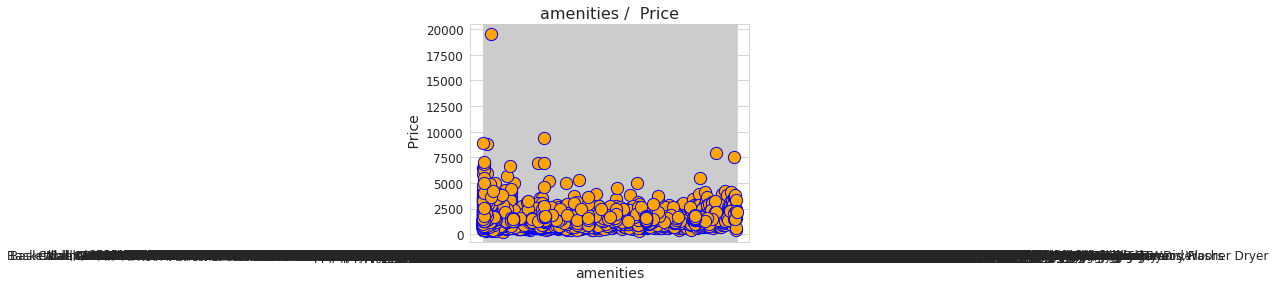

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



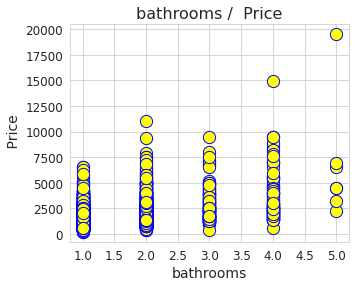

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



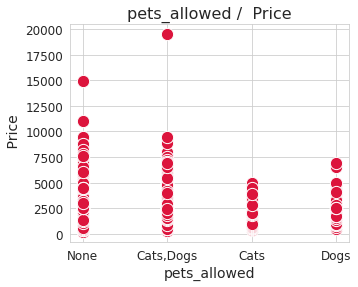

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



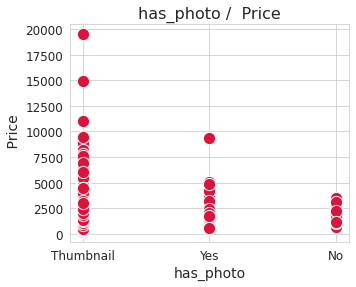

In [361]:
# 69. Scatter plot

def scatter_df(y_var):
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    
    plot1 = sb.scatterplot(i[0], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} /  Price'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel(' Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sb.scatterplot(i[1], y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} /  Price'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel(' Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
   
   
    
    plot3 = sb.scatterplot(i[4], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} /  Price'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel(' Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    plot4 = sb.scatterplot(i[3], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} /  Price'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel(' Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
scatter_df('price')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



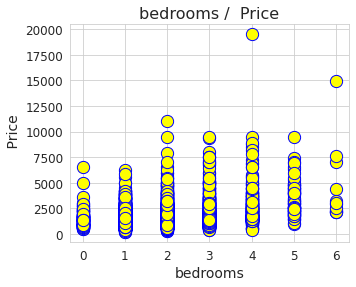

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



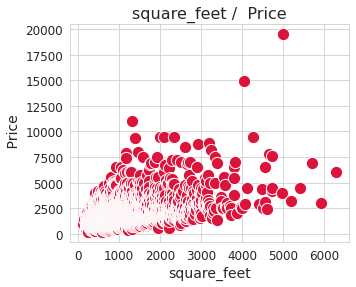

In [362]:
# 69. Scatter plot

def scatter_df(y_var):
    scatter_df = number_df.drop(y_var, axis = 1)
    i = number_df.columns

    
    plot2 = sb.scatterplot(i[1], y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} /  Price'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel(' Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
   
   
    
    plot5 = sb.scatterplot(i[3], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} /  Price'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel(' Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    
    
scatter_df('price')

# **(iii) Distribution Plot**
Distribution plots are very useful to check how well a variable is distributed in the dataset. Let’s now produce a distribution plot using the ‘distplot’ function to check the distribution of the ‘SalePrice’ variable in the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



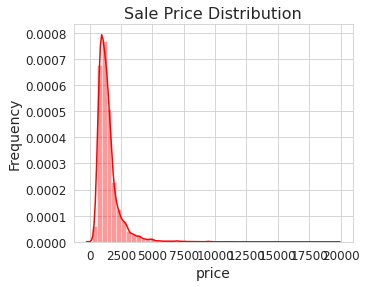

In [363]:

# 70. Distribution plot

sb.distplot(df['price'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

# **EDA**

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



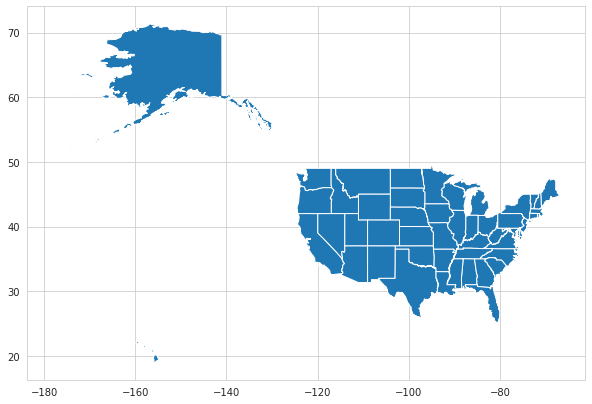

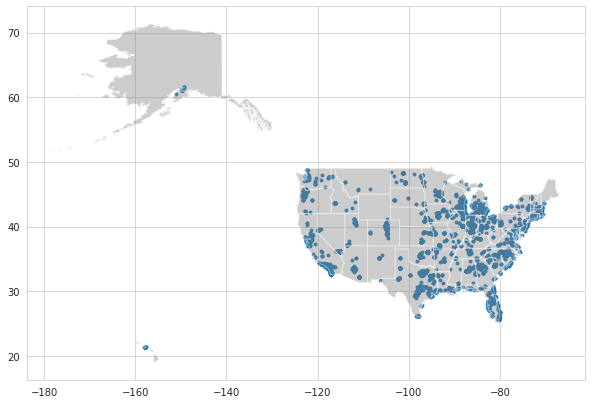

In [364]:
#27
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

#28
street_map=gpd.read_file("/content/USA_States.shp")
fig,ax=plt.subplots(figsize=(10,10))
street_map.plot(ax=ax)

#30
geometry= [Point(xy) for xy in zip(df["longitude"],df["latitude"])]
geometry[:3]
crs={"init":"epsg:4326"}
geo_df=gpd.GeoDataFrame(df,crs=crs,geometry=geometry)
geo_df.head()

#31
ax = geo_df['geometry'].plot(markersize=8, figsize=(10,10))
street_map.plot(ax=ax,alpha=0.4,color="grey")


# Prediction

In [365]:
#72
print(df['state'].value_counts())

TX    1555
CA     812
WA     361
NC     317
WI     299
FL     286
GA     279
IL     275
MD     236
IN     235
MO     232
CO     229
MN     221
OH     205
NJ     195
OR     192
IA     174
MI     170
VA     151
PA     130
OK     129
AZ     120
ND     112
MA     110
NE     102
TN      89
KS      83
UT      78
SC      73
NV      66
DC      64
SD      64
NY      61
LA      56
CT      54
AL      54
AR      52
AK      44
NH      38
KY      34
ID      21
NM      13
HI      12
VT      11
RI      10
MS       9
MT       6
DE       5
WV       2
ME       2
WY       1
Name: state, dtype: int64


In [366]:

df_fb = df.loc[df['state'] == 'TX']
df_fb=df_fb[["time","price"]]
df_fb.reset_index(drop=True, inplace=True)
df_fb

,time,price
0,2019-12-22 11:48:47,1000
1,2019-12-26 11:18:46,720
2,2019-12-26 11:21:00,705
3,2019-12-26 11:18:37,700
4,2019-12-22 11:43:39,700
...,...,...
1550,2019-12-26 11:05:40,1775
1551,2019-12-26 11:38:56,3500
1552,2019-12-26 11:36:11,2395
1553,2019-12-18 11:12:10,2500


remove time from time column

In [367]:
#74
df_fb.rename(columns={'time': 'ds', 'price': 'y'}, inplace=True)

In [368]:
#75
from fbprophet import Prophet

m = Prophet()
m.fit(df_fb)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [369]:
#76
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1321,2020-12-21 11:42:48
1322,2020-12-22 11:42:48
1323,2020-12-23 11:42:48
1324,2020-12-24 11:42:48
1325,2020-12-25 11:42:48


In [370]:
#77 Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1321,2020-12-21 11:42:48,"-1,556","-2,039","-1,059"
1322,2020-12-22 11:42:48,"-1,959","-2,497","-1,461"
1323,2020-12-23 11:42:48,"-1,724","-2,190","-1,244"
1324,2020-12-24 11:42:48,"-1,813","-2,296","-1,314"
1325,2020-12-25 11:42:48,"-2,114","-2,621","-1,635"


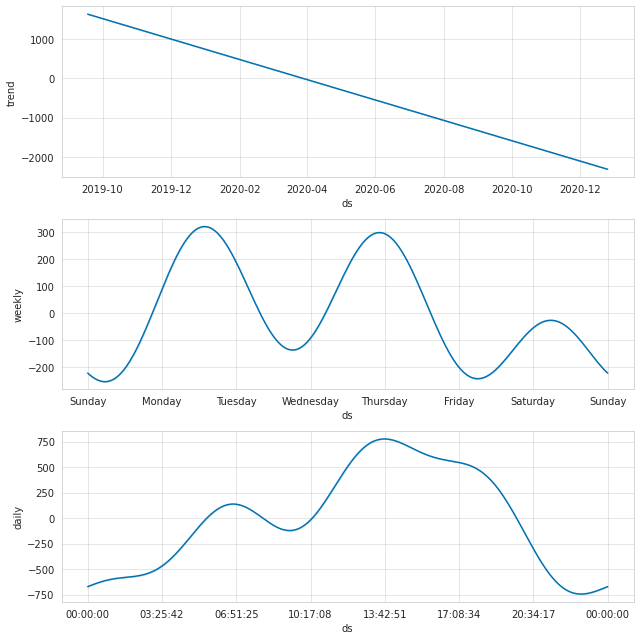

In [371]:
#78
fig2 = m.plot_components(forecast)